In [1]:
#% pip install openpyxl
import os, re, configparser
import pandas as pd
import numpy as np
from globals import glob
from utilities_database import prepare_data, prepare_database, consult_database, clear_databases, retrieve_data, rename_index, get_date, get_sigma, rename_limits_table
from utilities_analysis import mean_calculator, limits_generator, ini_generator, RyR, z_score_filter, reset_df, capability_calculation
from utilities_plotting import plot_scatter, plot_capability
import _db_tools as db

Database *input.db* found in: c:\Users\luciano.galan\Desktop\Codebase\Python_Eiit_RyR\a2_Analyser\database\input.db
Database *output.db* found in: c:\Users\luciano.galan\Desktop\Codebase\Python_Eiit_RyR\a2_Analyser\database\output.db


In [2]:
#Data extraction
table_names = ['TOP_PASSAT_B9_measurements_2023y_12m_13d_14h_49m_51s', 'TOP_Passat_B9_limits_corrected_2023y_12m_13d_15h_47m_46s']
MEAS = retrieve_data("input.db", table_names[0])
LIMITS = retrieve_data("output.db", table_names[1])

Table *TOP_PASSAT_B9_measurements_2023y_12m_13d_14h_49m_51s* retrieved succesfully.
Table *TOP_Passat_B9_limits_corrected_2023y_12m_13d_15h_47m_46s* retrieved succesfully.


In [3]:
MEAS_format = rename_index(MEAS); LIMITS_format = rename_index(LIMITS)
df = pd.concat([MEAS, LIMITS], axis=1)
df.columns = [f"Test: {i}" for i in range(1, df.shape[1]-1)] + ["LSL", "USL"]
df_format = pd.concat([MEAS_format, LIMITS_format], axis=1)
df_format.columns = [f"Test: {i}" for i in range(1, df_format.shape[1]-1)] + ["LSL", "USL"]
df_format

,Test: 1,Test: 2,Test: 3,Test: 4,Test: 5,Test: 6,Test: 7,Test: 8,Test: 9,Test: 10,...,Test: 42,Test: 43,Test: 44,Test: 45,Test: 46,Test: 47,Test: 48,Test: 49,LSL,USL
Guia_Luz_Blanco_FB1_X,0.3248,0.3261,0.3248,0.3252,0.3253,0.3249,0.3257,0.3256,0.3256,0.3244,...,0.3258,0.3241,0.3246,0.3253,0.3231,0.3244,0.3241,0.3249,0.313880,0.338880
Guia_Luz_Blanco_FB1_Y,0.3480,0.3489,0.3480,0.3491,0.3482,0.3485,0.3485,0.3497,0.3486,0.3476,...,0.3497,0.3481,0.3492,0.3497,0.3462,0.3479,0.3487,0.3483,0.333140,0.366740
Guia_Luz_Blanco_FB2_X,0.3340,0.3332,0.3313,0.3316,0.3329,0.3312,0.3326,0.3314,0.3330,0.3329,...,0.3312,0.3319,0.3307,0.3305,0.3305,0.3325,0.3305,0.3325,0.318586,0.343586
Guia_Luz_Blanco_FB2_Y,0.3590,0.3586,0.3568,0.3573,0.3584,0.3570,0.3582,0.3573,0.3586,0.3585,...,0.3573,0.3579,0.3571,0.3568,0.3565,0.3583,0.3569,0.3584,0.341680,0.375280
Guia_Luz_Blanco_FB3_X,0.3347,0.3385,0.3375,0.3383,0.3384,0.3383,0.3385,0.3384,0.3388,0.3387,...,0.3381,0.3383,0.3380,0.3384,0.3393,0.3384,0.3384,0.3390,0.326705,0.351705
Guia_Luz_Blanco_FB3_Y,0.3556,0.3659,0.3651,0.3658,0.3658,0.3657,0.3659,0.3659,0.3661,0.3661,...,0.3656,0.3657,0.3655,0.3658,0.3663,0.3658,0.3658,0.3663,0.349441,0.383041
Guia_Luz_Blanco_FB4_X,0.3247,0.3247,0.3250,0.3251,0.3244,0.3252,0.3247,0.3243,0.3246,0.3239,...,0.3234,0.3236,0.3235,0.3237,0.3238,0.3238,0.3233,0.3233,0.313880,0.338880
Guia_Luz_Blanco_FB4_Y,0.3463,0.3472,0.3467,0.3468,0.3471,0.3469,0.3474,0.3472,0.3464,0.3469,...,0.3468,0.3458,0.3462,0.3471,0.3463,0.3464,0.3468,0.3468,0.333140,0.366740
Guia_Luz_Blanco_FB5_X,0.3344,0.3318,0.3335,0.3336,0.3312,0.3334,0.3312,0.3315,0.3335,0.3310,...,0.3309,0.3333,0.3330,0.3311,0.3327,0.3332,0.3306,0.3309,0.318586,0.343586
Guia_Luz_Blanco_FB5_Y,0.3601,0.3585,0.3599,0.3599,0.3582,0.3599,0.3582,0.3585,0.3599,0.3582,...,0.3583,0.3598,0.3597,0.3583,0.3595,0.3599,0.3582,0.3582,0.341680,0.375280


In [4]:
#Calculate the specification values
    # means_df = rename_index(mean_calculator(MEAS) #Global means version
specification_means = mean_calculator(MEAS, glob.lenses_per_nest) #Mean per position version
specification_means_format = specification_means
resume = MEAS.transpose().describe().transpose() #Transpose the df first due to describe() working in columns
fiber_values = resume[['mean', 'std']]
fiber_values = fiber_values.rename(columns={'mean': 'fiber mean'})
specification_limits = df.iloc[:, -2:]
specification_limits = specification_limits.rename(columns={49: "LSL", 50: "USL"})
specification_limits_format = specification_limits
specifications = pd.concat([specification_means_format, fiber_values, specification_limits_format], axis=1)
specifications_format = rename_index(specifications)
specifications_format

,mean,fiber mean,std,LSL,USL
Guia_Luz_Blanco_FB1_X,0.326380,0.324796,0.000645,0.313880,0.338880
Guia_Luz_Blanco_FB1_Y,0.349940,0.348498,0.000819,0.333140,0.366740
Guia_Luz_Blanco_FB2_X,0.331086,0.331855,0.001032,0.318586,0.343586
Guia_Luz_Blanco_FB2_Y,0.358480,0.357639,0.000739,0.341680,0.375280
Guia_Luz_Blanco_FB3_X,0.339205,0.338300,0.000599,0.326705,0.351705
Guia_Luz_Blanco_FB3_Y,0.366241,0.365596,0.001476,0.349441,0.383041
Guia_Luz_Blanco_FB4_X,0.326380,0.324008,0.000560,0.313880,0.338880
Guia_Luz_Blanco_FB4_Y,0.349940,0.346508,0.000577,0.333140,0.366740
Guia_Luz_Blanco_FB5_X,0.331086,0.332345,0.001178,0.318586,0.343586
Guia_Luz_Blanco_FB5_Y,0.358480,0.359124,0.000823,0.341680,0.375280


In [5]:
#Calculate the capability values
sigma = 6
analysis = capability_calculation(specifications, sigma)
analysis_format = rename_index(analysis)
analysis_format

,mean,fiber mean,std,LSL,USL,CAL_LO_LIMIT,CAL_HI_LIMIT,Cp,Cpk
Guia_Luz_Blanco_FB1_X,0.326380,0.324796,0.000645,0.313880,0.338880,0.3229,0.3267,6.455104,5.637018
Guia_Luz_Blanco_FB1_Y,0.349940,0.348498,0.000819,0.333140,0.366740,0.3460,0.3510,6.834077,6.247344
Guia_Luz_Blanco_FB2_X,0.331086,0.331855,0.001032,0.318586,0.343586,0.3288,0.3350,4.038255,3.789861
Guia_Luz_Blanco_FB2_Y,0.358480,0.357639,0.000739,0.341680,0.375280,0.3554,0.3599,7.580336,7.200721
Guia_Luz_Blanco_FB3_X,0.339205,0.338300,0.000599,0.326705,0.351705,0.3365,0.3401,6.956532,6.453106
Guia_Luz_Blanco_FB3_Y,0.366241,0.365596,0.001476,0.349441,0.383041,0.3612,0.3700,3.793176,3.647568
Guia_Luz_Blanco_FB4_X,0.326380,0.324008,0.000560,0.313880,0.338880,0.3223,0.3257,7.434568,6.023821
Guia_Luz_Blanco_FB4_Y,0.349940,0.346508,0.000577,0.333140,0.366740,0.3448,0.3482,9.712625,7.728392
Guia_Luz_Blanco_FB5_X,0.331086,0.332345,0.001178,0.318586,0.343586,0.3288,0.3359,3.535678,3.179657
Guia_Luz_Blanco_FB5_Y,0.358480,0.359124,0.000823,0.341680,0.375280,0.3567,0.3616,6.806592,6.545515


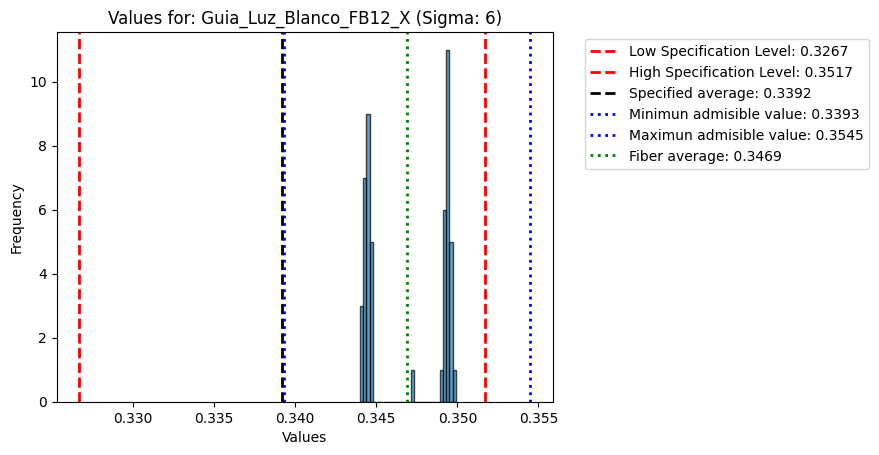

In [6]:
label = "Guia_Luz_Blanco_FB12_X"
plot_capability(MEAS_format, analysis_format, label, sigma)

In [7]:
import pandas as pd

# Using ?? to display documentation/source code
??plot_capability

Signature: plot_capability(measurements, analysis_table, label, sigma)
Source:   
def plot_capability(measurements, analysis_table, label, sigma):
    """Plot a histogram with specified limits and averages for a single fiber.
        Parameters:
        - measurements (pandas.DataFrame): DataFrame containing measurements for multiple fibers.
        - analysis_table (pandas.DataFrame): DataFrame containing analysis information for the specified fiber.
        - label (str): The label of the fiber for which the plot is generated.
        - sigma (float): The sigma value associated with the measurements.
        Returns:
        None
        This function generates a histogram for the specified fiber, overlaying it with vertical lines
        representing various limits and averages. The plot includes specification limits, calibration limits,
        the specified average, and the average of the fiber's measurements."""
    row = measurements.loc[label]
    mean = analysis_table.loc[labe